# New York City 2021 Graduation Rate Analysis
__(Phase 1)__
***
<pre>
Name: Tenicka Norwood
Program: self paced
Scheduled Project Review time: 11/1/2022
Instructor name: Joe Comeaux:
Blog post Url:
</pre>

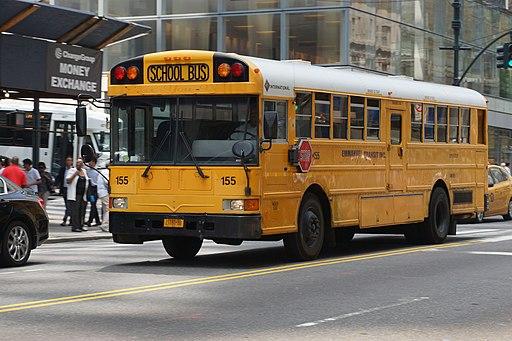
(Source:Wikimedia Commons [https://commons.wikimedia.org/)]

# Overview
***

As an educator, I am often digging deeper into data to share insights with teams both within schools and across the school district. My journey with data was rekindled in 2019 when I entered a leadership training program in my district, During the Summer months, I found myself in an awkward position, several of the data visualization tools that I leaned heavily into for my role were offline. I found myself with what my husband would call a sarcastic amount of spreadsheets that no one but myself and my immediate supervisor would touch. 

To paraphrase the greates woman I have ever known, my grammy Eloriosa Carey, Ooh wee, I was stuck in San Andros with no canoe. If I couldnt get my team to touch the data, how in the world would they do 
deep dives around improving student outcomes.  Luckily, my husband is in the field of analytics albeit in a completely different space and he recommended building a dashboard that mimicked the visualizations that I could no longer access.

The tools I used were: 
* Microsoft Excel
* <code>VLOOKUP()</code>
* pivot tables
* conditional formatting

# Data
***
My data was an externally provided set of csv files each with __17000 rows__ of data across __45 columns__ that included the following features: 
* StudentID &harr; int
* CreditStatus &harr; string
* CreditsEarned &harr; float
* TermID &harr; int
* SubjectArea &harr; string
* CourseCode &harr; string

At the time, I just wanted to provide my team with accurate and informative visualizations. So, I just followed where the data and my limited skills took me: *__pivot tables__

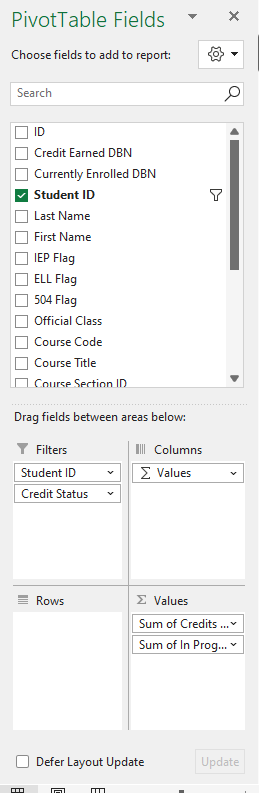


I must have put in around a week using every tool in my toolbox:

* StackOverflow Excel with VBA
* edX
* Youtube tutorials
* EdPuzzle
* My cohort husband Tommy
* Microsoft Word with mail merge wizard
I used Vlookup() to isolate features from my spreadsheets. 

For example I looked up a students' Cohort by  using the following code: 
<code> =VLOOKUP('Pivot Credits Accumulated'!$B$3,'general student data'!C:V,12,FALSE) </code>

First I used an IF() statement <code>=IF(AND(X41<65, X41>0), "Not Yet", "No Score")</code> to generate an exam Score of:

* Passing 
* No Score
* Not Yet

Then I used conditional formatting to fill a cell with:
* light blue if a student completed a subject specific graduation exam
* red if they had not passed a subject specific graduation exam 
    


This is what I ended up with two responsive visualizations for academic advisors:
* The first allows users search for their advisee's by student id and generate a visual that gave them instant feedback on a students' credit accumulation without killing a forest worth of trees to print permanent records, group them then disperse them. 
* The second generates a snapshot of graduation level exams for each student. 

I pair both visuals to the same pivot table so only one input needed to be entered per student.  


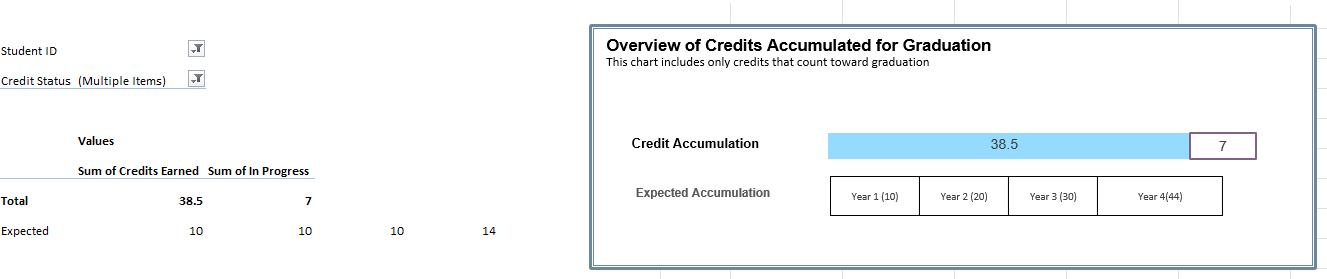

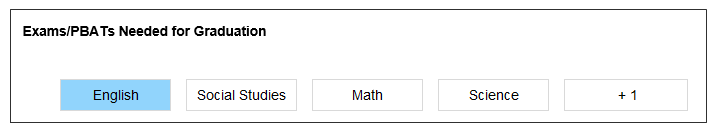




# Lessons Learned
* You can use <code> =Now() </code> to add dates to a cell in my ever changing set of visualizations. 
* You can use lookup tables to link to a primary key the way I did when Access was the way I interacted with databases. 
* Pivot tables can be used to create responsive visualizations

You know that feeling where you feel invincible, sort of like you could throw anvils across a room or complete a P90X video without crying? Well multiply that by 10 and you will have an inkling of how on top of the world I was feeling. I kept going until I realized that generating visuals that mimic existing tools was not quite what I wanted to do. Sure I had a back up plan in case the system went down at a crucial time again, but I wanted to learn more. 

One of the members of my extended network recommended the Flatiron school and after completing a few practice lessons and 5 zoom meetings later, I completed my application for the Flex Data Science program and am excited as I continue to learn new concepts. 

# Digging into Data after Joining Flatiron
***

Now before I start exploring data, I look at:
* How clean is it?
* How was it collected?
* What license is it available under?

I have learned that importing libraries and visualization packages allows me to be more effective in crafting insights, because my code can access other tools, projects become both more manageable and more impactful. 

My favorite libraries and visualization packages so far include: 
* <code> sqlite3 </code>: a library that allows accessing and manipulating databases
* <code> pandas </code>: a data analysis and manipulation library that allows flexible reshaping of dataframes
* <code> seaborn </code>: a data visualization library based on matplot lib

Right now, I am looking at data from: 

* [The New York State Education Department](https://data.nysed.gov/)

* [NYC Open Data](https://data.cityofnewyork.us/Education/2005-2015-Graduation-Outcomes/qk7d-gecv)

So I will import a set of libraries to explore this data:

In [9]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [79]:
# Read Tables from the NYSED Websit
overall_nyc_df= pd.read_html('https://data.nysed.gov/gradrate.php?instid=7889678368&year=2021&cohortgroup=1')


# Manhattan Schools
beacon_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046819&year=2021&cohortgroup=1')
eastside_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046774&year=2021&cohortgroup=1')
essex_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000058023&year=2021&cohortgroup=1')

In [80]:
# Write Data to csv files
overall_nyc = overall_nyc_df[0].to_csv('overall_nyc_from_nysed.csv')
beacon = beacon_df[0].to_csv('beacon.csv')
eastside = eastside_df[0].to_csv('eastside.csv')
essex = essex_df[0].to_csv('essex.csv')

In [81]:
# Read in the data
# Read Data from Box office Mojo
#class_2021_NYC_graduation_data = pd.read_csv('class_of_2021_NYC_graduation_data.csv')
#beacon_hs = pd.read_csv('2021_Beacon_HS_graduation_data.csv')
#eastside = pd.read_csv('2021_Eastside_Community_graduation_data.csv')
#essex = pd.read_csv('2021_Essex_Street_Academy_graduation_data.csv')
overall_nyc = pd.read_csv('overall_nyc_from_nysed.csv')
beacon = pd.read_csv('beacon.csv')
eastside = pd.read_csv('eastside.csv')
essex = pd.read_csv('essex.csv')

In [13]:
"""
This function plots a histogram given
a DataFrame, column name, title, xlabel and ylabel. 

The plot is customized to include a vertical line 
that represents the mean value of the 
"""
def plot_hist(df,column, title, xlabel, ylabel):
    # Initialize data
    data = df[column]
    mean = data.mean()
    # Set plot parameters
    fig, ax = plt.subplots(figsize = (12,8))
    # Plot histogram
    ax.hist(data, color = 'aquamarine', bins = "auto")
    # Plot vertical Line
    ax.axvline(mean, color = "black", linestyle = "dotted",label= "mean")
    #Customize title and axes labels
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel)
    ax.set_title(title);
    ax.legend();
    

In [14]:
"""
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    population : string
    lim: max value of graduation rate 
    
    
    Output: 
    -
    bar plot
    """
def plot_bar(df, population, lim):
    # Initialize data
    values = df.GRAD_PERCENTAGE
    labels = df.Subgroup
    xlabel = "Graduation Rate (%)"
    ylabel = "Population"
    title = "Graduation Rate by Subgroup for" + population + "As of June 2021"
    # Set plot parameters
    plt.figure(figsize = (14,10))

    clrs = ['grey' if (x != max(values)) else 'blue' for x in values]
    # Plot histogram
    ax = sns.barplot(x = values, y = labels, palette = clrs)
    # Plot vertical Line
#    ax.axvline(mean, color = "black", linestyle = "dotted",label= "mean")
    #Customize title and axes labels
    ax.set_xlabel(xlabel, fontsize = '16', weight = 'bold');
    ax.set_ylabel(ylabel, fontsize = '16', weight = 'bold')
    ax.set_title(title, weight = 'bold').set_fontsize('16');
    
    for bar in ax.patches:
        if bar.get_width() < lim:
            bar.set_color('grey')
        else:
            bar.set_color('blue')                

In [15]:
def summarize_dataframe(df):
    '''
    Summarizes each column in a Pandas dataframe, where each row of the 
    summary output is a column of the input dataframe, df
    Will show the datatype of data in the column, the number of missing values
    in that column, and the number of unique values in the column
    -
    Input:
    df : Pandas dataframe
    -
    Output:
    summary : Pandas dataframe, now showing column details
    '''
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index'] # name of each variable 
    summary = summary[['Name','dtypes']] # data type of each variable
    summary['Missing'] = df.isnull().sum().values # number of missing values  
    summary['Uniques'] = df.nunique().values # number of unique values
    return summary 

In [51]:
def format_df(df):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    
    
    Output: 
    -
    df_info: pandas dataframe information
    df_head: first 24 rows of pandas dataframe
    """
    
    df = pd.DataFrame(df)
    df.rename(columns={'Unnamed: 0': 'index', 'Subgroup': 'Subgroup','Total': "ALL_STUDENTS", 'GRAD RATE' : 'GRAD_RATE', 'GRAD RATE.1' :'GRAD_PERCENTAGE',
                      'REGENTS WITH ADVANCED DESIGNATION' : 'REGENTS_WITH_ADVANCED_DESIGNATION' 
                       ,'REGENTS WITH ADVANCED DESIGNATION.1' : 'REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE' ,
                       'REGENTS DIPLOMA' : 'REGENTS_DIPLOMA', 'REGENTS DIPLOMA.1' : 'REGENTS_DIPLOMA_PERCENTAGE',
                      'LOCAL DIPLOMA' : 'LOCAL_DIPLOMA', 'LOCAL DIPLOMA.1' : 'LOCAL_DIPLOMA_PERCENTAGE', 
                       'NON DIPLOMA CRED': 'NON_DIPLOMA_CRED', 'NON DIPLOMA CRED.1' : 'NON_DIPLOMA_CRED_PERCENTAGE',
                      'STILL ENROLLED' : 'STILL_ENROLLED', 'STILL ENROLLED.1': 'STILL_ENROLLED_PERCENTAGE',
                      'GED TRANSFER': 'GED_TRANSFER', 'GED TRANSFER.1' :'GED_TRANSFER_PERCENTAGE', 
                      'DROPOUT' :'DROPOUT', 'DROPOUT.1': 'DROPOUT_PERCENTAGE'}, inplace=True)
    
    for col in df.columns:
        print(col)
    df = df.replace({"—":"0"}, regex = True)
    df = df.replace({"\%":""}, regex = True)
    df.drop(0, inplace = True)
    df.drop(labels = "index", axis = 1, inplace = True)
    df = df.astype({col: int for col in df.columns[1:]})

  #  df_info = df.info()
  #  df_head = df.head(24)
    
  #  return df_head
    return df

In [90]:
def explore_df(df, school_name, mean_state_grad_rate):
    """
    This function explores a dataframe and generates 
    a graph and a summary of the dataframe
    
    Inputs
    --
    df: pandas dataframe
    
    Outputs
    --
    bargraph
    summary_df : summary of data frame 
    """
    formatted_df = format_df(df)
    summary_df = summarize_dataframe(formatted_df)
    plot = plot_bar(formatted_df, school_name, mean_state_grad_rate)
    
    return formatted_df
    return summary_df
    return plot

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


,Subgroup,ALL_STUDENTS,GRAD_RATE,GRAD_PERCENTAGE,REGENTS_WITH_ADVANCED_DESIGNATION,REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE,REGENTS_DIPLOMA,REGENTS_DIPLOMA_PERCENTAGE,LOCAL_DIPLOMA,LOCAL_DIPLOMA_PERCENTAGE,NON_DIPLOMA_CRED,NON_DIPLOMA_CRED_PERCENTAGE,STILL_ENROLLED,STILL_ENROLLED_PERCENTAGE,GED_TRANSFER,GED_TRANSFER_PERCENTAGE,DROPOUT,DROPOUT_PERCENTAGE
1,All Students,95,93,98,0,0,93,98,0,0,0,0,1,1,0,0,1,1
2,Female,68,67,99,0,0,67,99,0,0,0,0,1,1,0,0,0,0
3,Male,27,26,96,0,0,26,96,0,0,0,0,0,0,0,0,1,4
4,General Education Students,68,66,97,0,0,66,97,0,0,0,0,1,1,0,0,1,1
5,Students with Disabilities,27,27,100,0,0,27,100,0,0,0,0,0,0,0,0,0,0
6,American Indian or Alaska Native,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Asian or Native Hawaiian/Other Pacific Islander,8,8,100,0,0,8,100,0,0,0,0,0,0,0,0,0,0
8,Black or African American,26,26,100,0,0,26,100,0,0,0,0,0,0,0,0,0,0
9,Hispanic or Latino,42,41,98,0,0,41,98,0,0,0,0,0,0,0,0,1,2
10,White,10,10,100,0,0,10,100,0,0,0,0,0,0,0,0,0,0


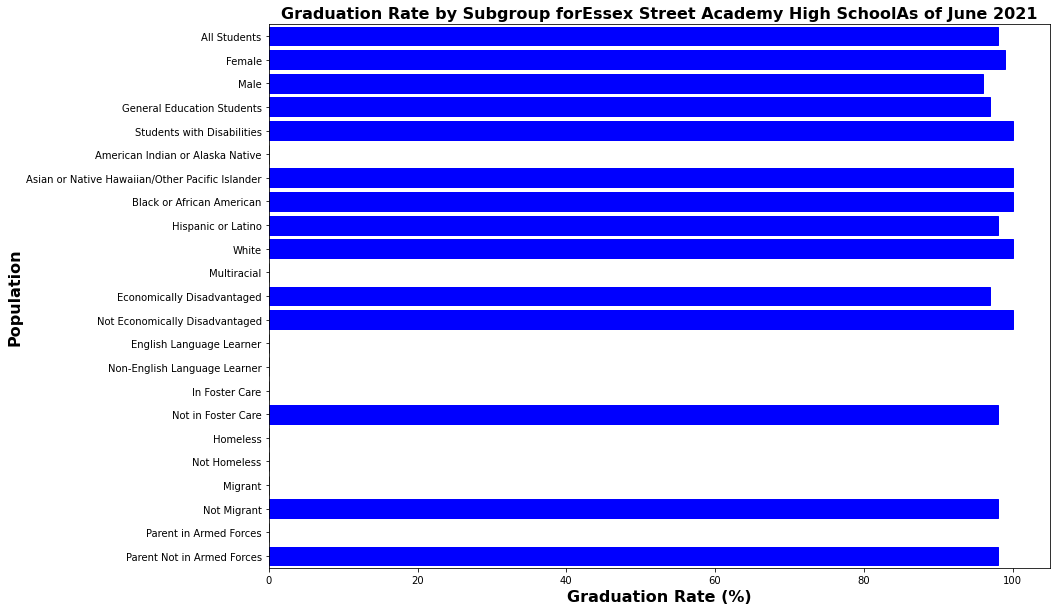

In [91]:
explore_df(essex, "Essex Street Academy High School", 84)

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


,Subgroup,ALL_STUDENTS,GRAD_RATE,GRAD_PERCENTAGE,REGENTS_WITH_ADVANCED_DESIGNATION,REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE,REGENTS_DIPLOMA,REGENTS_DIPLOMA_PERCENTAGE,LOCAL_DIPLOMA,LOCAL_DIPLOMA_PERCENTAGE,NON_DIPLOMA_CRED,NON_DIPLOMA_CRED_PERCENTAGE,STILL_ENROLLED,STILL_ENROLLED_PERCENTAGE,GED_TRANSFER,GED_TRANSFER_PERCENTAGE,DROPOUT,DROPOUT_PERCENTAGE
1,All Students,80294,62636,78,27739,35,34114,42,783,1,235,0,13020,16,603,1,3751,5
2,Female,38739,32341,83,15447,40,16523,43,371,1,91,0,4831,12,225,1,1242,3
3,Male,41555,30295,73,12292,30,17591,42,412,1,144,0,8189,20,378,1,2509,6
4,General Education Students,62760,53154,85,26261,42,26698,43,195,0,4,0,6642,11,395,1,2550,4
5,Students with Disabilities,17534,9482,54,1478,8,7416,42,588,3,231,1,6378,36,208,1,1201,7
6,American Indian or Alaska Native,913,707,77,280,31,414,45,13,1,0,0,150,16,14,2,42,5
7,Asian or Native Hawaiian/Other Pacific Islander,13154,11658,89,8156,62,3484,26,18,0,14,0,1074,8,54,0,352,3
8,Black or African American,20655,15556,75,4389,21,10966,53,201,1,75,0,3786,18,195,1,1017,5
9,Hispanic or Latino,31662,23656,75,8799,28,14627,46,230,1,115,0,5549,18,294,1,2029,6
10,White,12486,9906,79,5593,45,4065,33,248,2,28,0,2218,18,44,0,288,2


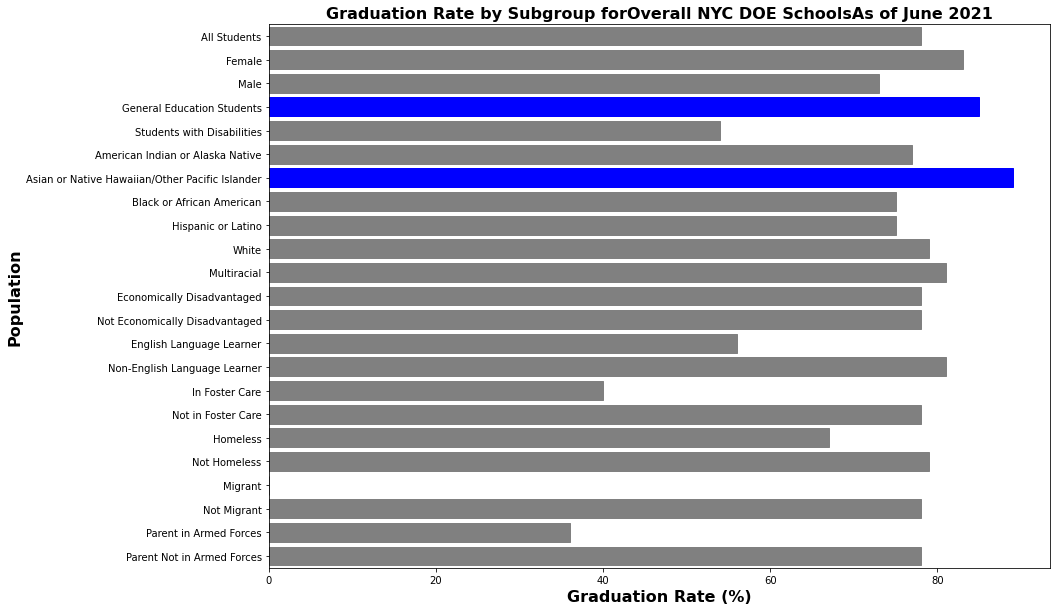

In [92]:
explore_df(overall_nyc, "Overall NYC DOE Schools", 84)

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


,Subgroup,ALL_STUDENTS,GRAD_RATE,GRAD_PERCENTAGE,REGENTS_WITH_ADVANCED_DESIGNATION,REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE,REGENTS_DIPLOMA,REGENTS_DIPLOMA_PERCENTAGE,LOCAL_DIPLOMA,LOCAL_DIPLOMA_PERCENTAGE,NON_DIPLOMA_CRED,NON_DIPLOMA_CRED_PERCENTAGE,STILL_ENROLLED,STILL_ENROLLED_PERCENTAGE,GED_TRANSFER,GED_TRANSFER_PERCENTAGE,DROPOUT,DROPOUT_PERCENTAGE
1,All Students,382,368,96,0,0,368,96,0,0,0,0,11,3,0,0,3,1
2,Female,234,222,95,0,0,222,95,0,0,0,0,9,4,0,0,3,1
3,Male,148,146,99,0,0,146,99,0,0,0,0,2,1,0,0,0,0
4,General Education Students,351,338,96,0,0,338,96,0,0,0,0,11,3,0,0,2,1
5,Students with Disabilities,31,30,97,0,0,30,97,0,0,0,0,0,0,0,0,1,3
6,American Indian or Alaska Native,7,6,86,0,0,6,86,0,0,0,0,1,14,0,0,0,0
7,Asian or Native Hawaiian/Other Pacific Islander,34,33,97,0,0,33,97,0,0,0,0,0,0,0,0,1,3
8,Black or African American,57,56,98,0,0,56,98,0,0,0,0,1,2,0,0,0,0
9,Hispanic or Latino,81,77,95,0,0,77,95,0,0,0,0,3,4,0,0,1,1
10,White,155,152,98,0,0,152,98,0,0,0,0,3,2,0,0,0,0


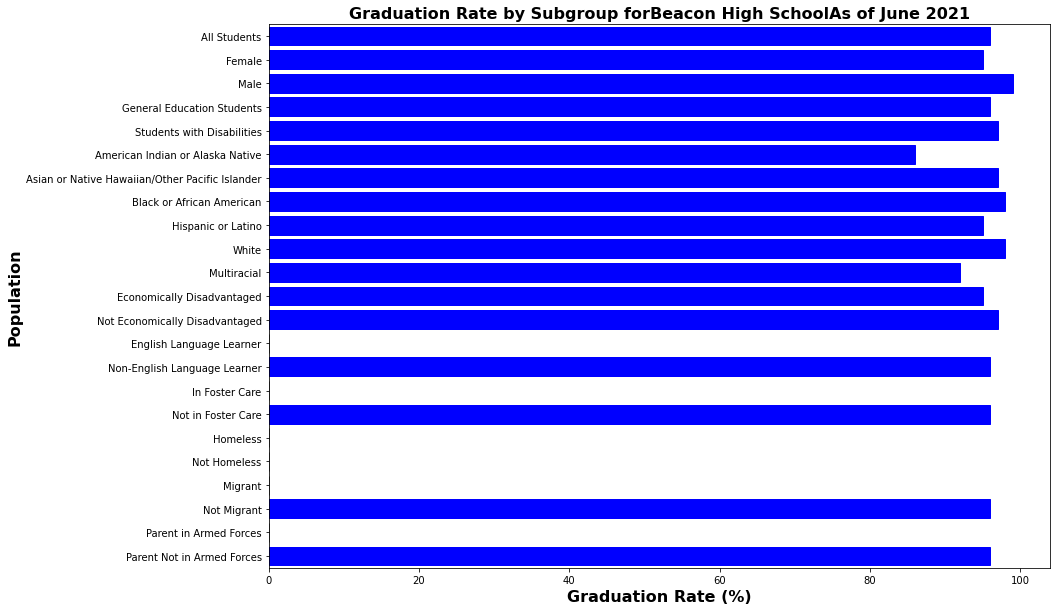

In [93]:
explore_df(beacon, "Beacon High School", 84)